In [92]:
import manipulate_text as mt
import numpy as np
import os
import matplotlib.pyplot as plt
import constants_and_functions as cf
from astropy.io import fits
import re
from scipy import interpolate

In [ ]:
#this makes final plots for diffusion coefficient, loss coefficient

In [84]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sig_types = ['electron_spectrum', 'equillibrium_distribution', 'synchrotron_emission', 'inverse_compton', 'photon_spectrum']
base_path = os.getcwd().split('scripts')[0]
fig_path = base_path + 'figs/'
fits_path = base_path.split('Secondary_radiation')[0] + 'synchrotron_data/'
fits_name = 'm31cm3nthnew.ss.90sec.fits'

In [55]:
def latex_float(f, n):
    kwrd = '{0:.' +str(n)+ 'g}'
    float_str = kwrd.format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

In [182]:
nE = 400
nr = 800
sig_type = 1
rmax = 50000
me = 5.10999*10**(-4)
r = np.linspace(0, rmax, nr+3)
r = r[1:-2]
sigmav_bench = 2.2e-26
mx_start = 6
mx_stop = 500
num_mx = 20
D0_set_in = np.array([3e28])
mx_set_in = np.round(np.logspace(np.log10(mx_start), np.log10(mx_stop), num_mx), 1)

In [183]:
run_list = mt.find_results(sig_type, astro_model='Andromeda1', spherical_ave=['unweighted', 'weighted_dl'], D0=D0_set_in)
res_set = []
mx_set_out = []
D0_set_out = []
sphericalave_out = []
for run in run_list:
    print(run)
    mx_set_out.append(run['mx'])
    D0_set_out.append(run['D0'])
    sphericalave_out.append(run['Spherical Average'])
    array_file_name = run['file_name'].split('_info')[0] + '.npy'
    this_res = np.load(base_path + sig_types[sig_type] + '/' + array_file_name)
    res_set.append(this_res)
mx_set_out = np.array(mx_set_out)
D0_set_out = np.array(D0_set_out)
res_set = np.array(res_set)



{'file_name': '0062_equillibrium_distribution_info.txt', 'mx': 6.0, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0065_equillibrium_distribution_info.txt', 'mx': 7.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0068_equillibrium_distribution_info.txt', 'mx': 9.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0071_equillibrium_distribution_info.txt', 'mx': 12.1, 'D0': 3e+28, 'ch

In [14]:
res_set.shape

(40, 400, 800)

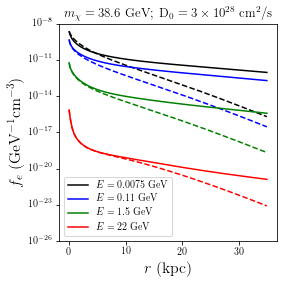

In [184]:
i_40gev = np.where(np.abs(mx_set_out-40)<5)[0]
E = np.logspace(np.log10(me), np.log10(mx_set_out[i_40gev[0]]), nE+2)
E = E[1:-1]
int_maxr = int(np.max(np.where(r<35000)[0]))
colors = ['k', 'b', 'g', 'r']
styles = ['--', '-']
jE = 95*np.linspace(1, 4, 4).astype(int)
for j in range(len(jE)):
    for i in range(len(i_40gev)):
        if sphericalave_out[i_40gev[i]]=='weighted_dl':
            label_str = r'$E = ' +latex_float(E[jE[j]], 2)+ r'\; \rm{GeV}$'
        else:
            label_str = '_nolegend_'
        plt.plot(r[:int_maxr]/1000, res_set[i_40gev[i], jE[j], :int_maxr]/(r[:int_maxr]*cf.cm_per_pc**3), color=colors[j], linestyle=styles[i], label=label_str)
plt.title(r'$m_\chi = ' + str(mx_set_out[i_40gev[i]]) + r'\;\rm{GeV} ; \; D_0 = ' + latex_float(D0_set_out[i_40gev[i]], 1) + r'\; \rm{cm^2/s}$' , size=13)
plt.xlabel(r'$r \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$f_e \; \rm{(GeV^{-1} cm^{-3})}$', size=16)
ax = plt.gca()
ax.set_box_aspect(1)
ax.set_ylim([1e-26, 1e-8])
plt.legend()
plt.yscale('log')
#plt.savefig(fig_path+'Equil_density_vs_E.pdf')

E_target = 1.497775259348846


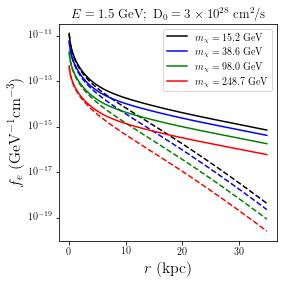

In [185]:
ind_mx = np.array([np.arange(4, 17, 4), np.arange(24, 37, 4)])
E40 = np.logspace(np.log10(me), np.log10(mx_set_out[i_40gev[0]]), nE+2)
E_tar = E40[3*95]
print('E_target = '+ str(E_tar))
for i in range(ind_mx.shape[0]):
    for j in range(len(ind_mx[i])):
        if sphericalave_out[ind_mx[i,j]]=='weighted_dl':
            label_str = r'$m_\chi = ' +str(mx_set_out[ind_mx[i,j]])+ r'\; \rm{GeV}$'
        else:
            label_str = '_nolegend_'
        E = np.logspace(np.log10(me), np.log10(mx_set_out[ind_mx[i,j]]), nE+2)
        E = E[1:-1]
        indE = np.where(np.abs(E-E_tar)== np.min(np.abs(E-E_tar)))[0][0]
        plt.plot(r[:int_maxr]/1000, res_set[ind_mx[i,j], indE, :int_maxr]/(r[:int_maxr]*cf.cm_per_pc**3),\
                 color=colors[j], linestyle=styles[i], label=label_str)
plt.title(r'$E = ' + latex_float(E_tar, 3) + r'\; \rm{GeV}; \; D_0 = ' + latex_float(D0_set_out[0], 1) + r'\; \rm{cm^2/s}$' , size=13)
plt.xlabel(r'$r \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$f_e \; \rm{(GeV^{-1} cm^{-3})}$', size=16)
plt.yscale('log')
ax = plt.gca()
ax.set_box_aspect(1)
plt.legend()
#plt.savefig(fig_path+'Equil_density_vs_mx.pdf')

In [162]:
res_set.shape

(40, 400, 800)

In [186]:
D0_set_in = np.array([3e27, 3e28, 3e29])
run_list = mt.find_results(sig_type, mx=mx_set_in[np.where(np.abs(mx_set_in-40)<5)[0][0]], astro_model='Andromeda1', spherical_ave=['unweighted', 'weighted_dl'], D0=D0_set_in)
res_set = []
mx_set_out = []
D0_set_out = []
sphericalave_out = []
for run in run_list:
    print(run)
    mx_set_out.append(run['mx'])
    D0_set_out.append(run['D0'])
    sphericalave_out.append(run['Spherical Average'])
    array_file_name = run['file_name'].split('_info')[0] + '.npy'
    this_res = np.load(base_path + sig_types[sig_type] + '/' + array_file_name)
    res_set.append(this_res)
mx_set_out = np.array(mx_set_out)
D0_set_out = np.array(D0_set_out)
res_set = np.array(res_set)

{'file_name': '0085_equillibrium_distribution_info.txt', 'mx': 38.6, 'D0': 3e+27, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0086_equillibrium_distribution_info.txt', 'mx': 38.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0087_equillibrium_distribution_info.txt', 'mx': 38.6, 'D0': 3e+29, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted'}
{'file_name': '0145_equillibrium_distribution_info.txt', 'mx': 38.6, 'D0': 3e+27, 

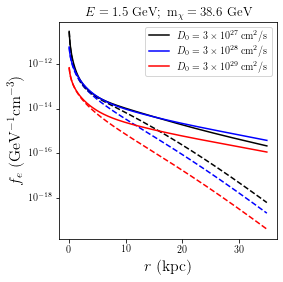

In [188]:
colors = ['k', 'b', 'r']
E = np.logspace(np.log10(me), np.log10(mx_set_out[0]), nE+2)
E[1:-1]
Eind = 3*95
E_tar = E[Eind]
for D0, sph_ave, res in zip(D0_set_out, sphericalave_out, list(res_set)):
    if sph_ave=='weighted_dl':
        label_str = r'$D_0 = ' + latex_float(D0, 1) + r'\; \rm{cm^2/s}$'
        line = '-'
    else:
        label_str = '_nolegend_'
        line='--'
    if D0==3e27:
        c = colors[0]
    elif D0==3e28:
        c = colors[1]  
    elif D0==3e29:
        c = colors[2]
    plt.plot(r[:int_maxr]/1000, res[Eind, :int_maxr]/(r[:int_maxr]*cf.cm_per_pc**3), color=c, linestyle=line, label=label_str)
    
plt.title(r'$E = ' + latex_float(E_tar, 3) + r'\; \rm{GeV}; \; m_\chi = ' + str(mx_set_out[0]) + r'\; \rm{GeV}$' , size=13)
plt.xlabel(r'$r \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$f_e \; \rm{(GeV^{-1} cm^{-3})}$', size=16)
plt.yscale('log')
ax = plt.gca()
ax.set_box_aspect(1)
plt.legend()
plt.savefig(fig_path+'Equil_density_vs_D0.pdf')

In [74]:
type(list(res_set)[0])

numpy.ndarray

In [123]:
def get_data_and_info(fits_path, fits_name):
    #extract data and information about data
    hdul = fits.open(fits_path+fits_name)
    data_uJ = hdul[0].data[0]
    data = data_uJ/1000 #mJ/beam
    hdr = hdul[0].header
    dlt_N_deg = abs(hdr['CDELT1'])
    dlt_n_deg = abs(hdr['CDELT2'])
    N = hdr['NAXIS1']
    n = hdr['NAXIS2']
    nu_data = hdr['CRVAL3']
    nu_BW = hdr['CDELT3']
    HPBW_deg = hdr['BMIN']
    return data, dlt_N_deg, dlt_n_deg, N, n, HPBW_deg, nu_data, nu_BW 

def make_coords(N, n, dlt_N, dlt_n, loc='centered'):
    if loc=='centered':
        ax_N_unit = np.linspace(-(N-1)/2, (N-1)/2, N)
        ax_n_unit = np.linspace(-(n-1)/2, (n-1)/2, n)
    elif loc=='edges':
        ax_N_unit = np.linspace(-N/2, N/2, N+1)
        ax_n_unit = np.linspace(-n/2, n/2, n+1)
    return dlt_N*ax_N_unit, dlt_n*ax_n_unit

def gen_templates(run, nu, Omega_beam, ax_x=None, ax_y=None, test_conv=False):

    #bring in variables from the run
    txt_file_name = run['file_name']
    nx = run['nx']
    nnu = run['nnu']
    ny = run['ny']
    thxrange=run['thx_range']
    thyrange=run['thy_range']
    sigmav_bench = run['sigma_v']
    nu_range = run['nu_range']
    astro_model = run['Astrophysical Model']
    am = __import__(astro_model)
    
    #process run variables
    array_file_name = txt_file_name.split('_info')[0] + '.npy'
    m = re.search('[0-9]{4}_', array_file_name)
    out_type = array_file_name.split('.npy')[0].split(m.group(0))[-1]
    
    #set coordinates for synchrotron spectrum
    nuv = np.logspace(np.log10(nu_range[0]), np.log10(nu_range[1]), nnu)
    thx_full = np.linspace(-thxrange, thxrange, 2*nx)
    thy_full = np.linspace(-thyrange, thyrange, 2*ny)
    thxv = thx_full[nx:]
    thyv = thy_full[ny:]
    thx2d, thy2d = np.meshgrid(thxv, thyv)
    thx3d = np.repeat(np.array([thx2d]), nnu, axis=0)
    thy3d = np.repeat(np.array([thy2d]), nnu, axis=0)
    nu3d = np.multiply.outer(nuv, np.ones((ny, nx)))
    
    #load synchrotron emission result
    dSdnudOmega = np.load(base_path + out_type + '/' + array_file_name) #erg cm^-2 s^-1 Sr^-1
    flux_beam = ((10**26/nu3d)*dSdnudOmega*Omega_beam).astype(np.float64)
    #determine central fequency
    ind_nu = np.where(np.min(np.abs(nuv-nu))==np.abs(nuv-nu))[0][0]
    if test_conv:
        #replace 0s with 1e-300
        nu_fin_ind = nnu
        #find max synch frequency index and extrapolate to rho=0
        for i in range(flux_init.shape[0]):
            zs = np.where(flux_init[i] == 0)
            if len(zs[0]) == nx*ny:
                nu_fin_ind = i #max frequency index + 1
                break
            else:
                for iy, ix in zip(zs[0], zs[1]):
                    flux_init[i, iy, ix] = 1e-300
        #copy results of analysis into other quadrants
        flux_init = flux_beam
        flux_flipx = np.flip(flux_init, axis=2)
        flux_new = np.concatenate((flux_flipx, flux_init), axis=2)
        flux_flipy = np.flip(flux_new, axis=1)
        flux = np.concatenate((flux_flipy, flux_new), axis=1)
        
        #Interpolate every frequency with respect to x and y
        lnflux_interp = [interpolate.interp2d(thx_full, thy_full, np.log(f), kind='cubic') for f in flux]
        
        #Convolve with gaussian beam for a few pixels and all frequencies
        #Interpolate with respect to nu for each spatial pixel that is computed at last step.
        #Convolve with gaussian in frequency for each of these pixels
        #Store x,y interpolation at the central frequency with a standard name
    else:
        #Do all of this for central frequency only
        flux_init = flux_beam[ind_nu]
        
        #copy results of analysis into other quadrants
        flux_flipx = np.flip(flux_init, axis=1)
        flux_new = np.concatenate((flux_flipx, flux_init), axis=1)
        flux_flipy = np.flip(flux_new, axis=0)
        flux = np.concatenate((flux_flipy, flux_new), axis=0)
        
        #Interpolate with respect to x and y
        lnflux_interp = interpolate.interp2d(thx_full, thy_full, np.log(flux), kind='cubic')
        if ax_x is None:
            return lnflux_interp
        else:
            return np.exp(lnflux_interp(ax_x, ax_y))
        
def sort_runs(mx_set, D0_set, args=None, rtrn='inds'):
    D0_vals = np.sort(np.unique(D0_set))
    ind_set = []
    for D0_val in D0_vals:
        ind_D0val = np.where(D0_set==D0_val)[0]
        p_D0val = np.argsort(mx_set[ind_D0val])
        ind_set.append(ind_D0val[p_D0val])
    ind_set_tup = tuple(ind_set)
    ind_full = np.hstack(ind_set_tup)
    if rtrn == 'inds':
        return ind_full
    elif rtrn == 'arrs':
        if args==None:
            return mx_set[ind_full], D0_set[ind_full]
        else:
            return mx_set[ind_full], D0_set[ind_full], tuple(args[i][ind_full] for i in range(len(args)))

In [119]:
#extract info about data
data, dlt_N_deg, dlt_n_deg, N, n, HPBW_deg, nu_data, nu_BW = get_data_and_info(fits_path, fits_name)
dlt_N = dlt_N_deg*np.pi/180
dlt_n = dlt_n_deg*np.pi/180
HPBW = HPBW_deg*np.pi/180
sigma_BW = HPBW/(2*np.sqrt(2*np.log(2)))
omega_beam = 2*np.pi*sigma_BW**2
print('real data info extracted')

#create coords for data
ax_N, ax_n = make_coords(N, n, dlt_N, dlt_n)
AX_N, AX_n = np.meshgrid(ax_N, ax_n)
THETA = np.sqrt(AX_N**2+AX_n**2)
sigma_rms = [0.25, 0.3]
l = 2/3
b = 2/3
outside = np.logical_or(np.abs(AX_N)>(l/2)*np.pi/180, np.abs(AX_n)>(b/2)*np.pi/180)
inside = np.logical_not(outside)
noise = sigma_rms[-1]*outside + sigma_rms[0]*inside
rl_mask = ''

real data info extracted


In [207]:
sigmav_bench = 2.2e-26
mx_start = 6
mx_stop = 500
num_mx = 20
sig_type = 2

#make these be  in increasing order
D0_set_in = np.array([3e28])
mx_set_in = np.round(np.logspace(np.log10(mx_start), np.log10(mx_stop), num_mx), 1)

In [208]:
mx40 = mx_set_in[np.where(np.abs(mx_set_in-40)<5)[0][0]]
#extract info of runs that match criteria
run_list = mt.find_results(sig_type, astro_model='Andromeda1', spherical_ave=['weighted_dl', 'unweighted'], mx=mx40, D0=D0_set_in)
num_runs = len(run_list)
print('length of run_list: ', str(num_runs))
sig_set = []
mx_set_out = []
D0_set_out = []
sphericalave_out = []
for run in run_list:
    print(run)
    mx_set_out.append(run['mx'])
    D0_set_out.append(run['D0'])
    sphericalave_out.append(run['Spherical Average'])
    this_sig = gen_templates(run, nu_data, omega_beam)
    sig_set.append(this_sig)
mx_set_out = np.array(mx_set_out)
D0_set_out = np.array(D0_set_out)
print(sphericalave_out)
#sort runs
ind = sort_runs(mx_set_out, D0_set_out)
mx_set_out = mx_set_out[ind]
D0_set_out = D0_set_out[ind]
sig_set = [sig_set[i] for i in ind]
run_list = [run_list[i] for i in ind]
sphericalave_out = [sphericalave_out[i] for i in ind]

0.017
0.017
length of run_list:  2
{'file_name': '0086_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
{'file_name': '0146_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'weighted_dl', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
['unweighted', 'weighted_dl']


In [209]:
print(sphericalave_out)
print(mx_set_out)
print(D0_set_out)

['unweighted', 'weighted_dl']
[38.6 38.6]
[3.e+28 3.e+28]


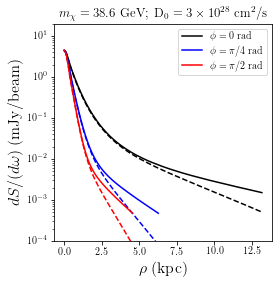

In [210]:
DA=780
thx_max_deg = 58/60
thy_max_deg = 20/60
thx_max = thx_max_deg*np.pi/180
thy_max = thy_max_deg*np.pi/180
thx = np.linspace(0, thx_max, 200)
thy = np.linspace(0, thy_max, 100)
indy45_end = int(np.max(np.where(thx<thy_max)[0]))
thx_45 = thx[:indy45_end]
thy_45 = thx[:indy45_end]
ls = ['--', '-']
colors = ['k', 'b', 'r']
th_ar = [[thx, 0*thx], [thx_45, thy_45], [0*thy, thy]]
phis= ['0', '\pi/4', '\pi/2']
for sig, sphericalave, mx, D0, line in zip(sig_set, sphericalave_out, mx_set_out, D0_set_out, ls):
    for th, c, phi in zip(th_ar, colors, phis):
        sig_ar = np.array([np.exp(sig(x, y)) for x, y in zip(th[0], th[1])])
        if sphericalave =='weighted_dl':
            label_str = r'$\phi = ' + phi + r' \; \rm{rad}$'
        else:
            label_str = '_nolegend_'
        
        plt.plot(np.sqrt(th[0]**2+th[1]**2)*DA, sig_ar, linestyle=line, color=c, label=label_str)

plt.title(r'$m_\chi = ' + str(mx40) + r'\; \rm{GeV}; \; D_0 = ' + latex_float(D0_set_out[0], 1) + r'\; \rm{cm^2/s}$' , size=13)
plt.xlabel(r'$\rho \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$dS/(d\omega) \; \rm{(mJy/beam)}$', size=16)
plt.yscale('log')
ax = plt.gca()
ax.set_ylim([1e-4, 2e1])
ax.set_box_aspect(1)
plt.legend()
plt.savefig(fig_path+'sync_flux_vs_phi.pdf')

In [201]:
sigmav_bench = 2.2e-26
mx_start = 6
mx_stop = 500
num_mx = 20
sig_type = 2

#make these be  in increasing order
D0_set_in = np.array([3e28])
mx_set_in = np.round(np.logspace(np.log10(mx_start), np.log10(mx_stop), num_mx), 1)

In [202]:
b = np.logical_or(np.logical_or(np.abs(mx_set_in-15)<2.5, np.abs(mx_set_in-40)<2.5), np.logical_or(np.abs(mx_set_in-100)<2.5, np.abs(mx_set_in-250)<2.5))
mx_in = mx_set_in[np.where(b)[0]]
#extract info of runs that match criteria
run_list = mt.find_results(sig_type, astro_model='Andromeda1', spherical_ave=['weighted_dl', 'unweighted'], mx=mx_in, D0=D0_set_in)
num_runs = len(run_list)
print('length of run_list: ', str(num_runs))
sig_set = []
mx_set_out = []
D0_set_out = []
sphericalave_out = []
for run in run_list:
    print(run)
    mx_set_out.append(run['mx'])
    D0_set_out.append(run['D0'])
    sphericalave_out.append(run['Spherical Average'])
    this_sig = gen_templates(run, nu_data, omega_beam)
    sig_set.append(this_sig)
mx_set_out = np.array(mx_set_out)
D0_set_out = np.array(D0_set_out)
print(sphericalave_out)
#sort runs
ind = sort_runs(mx_set_out, D0_set_out)
mx_set_out = mx_set_out[ind]
D0_set_out = D0_set_out[ind]
sig_set = [sig_set[i] for i in ind]
run_list = [run_list[i] for i in ind]
sphericalave_out = [sphericalave_out[i] for i in ind]

0.017
0.017
0.017
0.017
0.017
0.017
0.017
0.017
length of run_list:  8
{'file_name': '0074_synchrotron_emission_info.txt', 'mx': 15.2, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
{'file_name': '0086_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
{'file_name': '0098_synchrotron_emission_info.txt', 'mx': 9

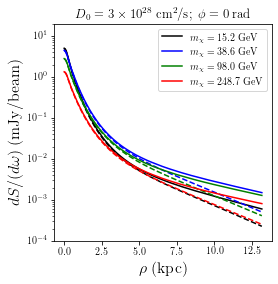

In [203]:
DA=780
thx_max_deg = 58/60
thx_max = thx_max_deg*np.pi/180
thx = np.linspace(0, thx_max, 200)
ls = ['--', '-']
colors = ['k', 'b', 'g', 'r']
mx_in = np.sort(mx_in)
th = [thx, 0*thx]
for sig, sphericalave, mx, D0 in zip(sig_set, sphericalave_out, mx_set_out, D0_set_out):
    mx_ind = np.where(mx_in==mx)[0][0]
    if sphericalave=='weighted_dl':
        label_str = r'$m_\chi = ' + str(mx) + r' \; \rm{GeV}$'
        line = ls[1]
    else:
        label_str = '_nolegend_'
        line=ls[0]
    sig_ar = np.array([np.exp(sig(x, y)) for x, y in zip(th[0], th[1])])
    plt.plot(th[0]*DA, sig_ar, linestyle=line, color=colors[mx_ind], label=label_str)
    
plt.title(r'$D_0 = ' + latex_float(D0_set_out[0], 1) + r'\; \rm{cm^2/s}; \; \phi = ' + str(0) + r'\; \rm{rad}$' , size=13)
plt.xlabel(r'$\rho \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$dS/(d\omega) \; \rm{(mJy/beam)}$', size=16)
plt.yscale('log')
ax = plt.gca()
ax.set_ylim([1e-4, 2e1])
ax.set_box_aspect(1)
plt.legend()
plt.savefig(fig_path+'sync_flux_vs_mx.pdf')

In [204]:
sigmav_bench = 2.2e-26
mx_start = 6
mx_stop = 500
num_mx = 20
sig_type = 2

#make these be  in increasing order
D0_set_in = np.array([3e27, 3e28, 3e29])
mx_set_in = np.round(np.logspace(np.log10(mx_start), np.log10(mx_stop), num_mx), 1)

In [205]:
mx40_ind = np.where(np.abs(mx_set_in-40) == np.min(np.abs(mx_set_in-40)))[0][0]
#extract info of runs that match criteria
run_list = mt.find_results(sig_type, astro_model='Andromeda1', spherical_ave=['weighted_dl', 'unweighted'], mx=mx_set_in[mx40_ind], D0=D0_set_in)
num_runs = len(run_list)
print('length of run_list: ', str(num_runs))
sig_set = []
mx_set_out = []
D0_set_out = []
sphericalave_out = []
for run in run_list:
    print(run)
    mx_set_out.append(run['mx'])
    D0_set_out.append(run['D0'])
    sphericalave_out.append(run['Spherical Average'])
    this_sig = gen_templates(run, nu_data, omega_beam)
    sig_set.append(this_sig)
mx_set_out = np.array(mx_set_out)
D0_set_out = np.array(D0_set_out)
print(sphericalave_out)
#sort runs
ind = sort_runs(mx_set_out, D0_set_out)
mx_set_out = mx_set_out[ind]
D0_set_out = D0_set_out[ind]
sig_set = [sig_set[i] for i in ind]
run_list = [run_list[i] for i in ind]
sphericalave_out = [sphericalave_out[i] for i in ind]

0.017
0.017
0.017
0.017
0.017
0.017
length of run_list:  6
{'file_name': '0085_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3e+27, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
{'file_name': '0086_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3e+28, 'channel': 'bb_bar', 'nr': 800, 'nE': 400, 'sigma_v': 2.2e-26, 'DM_model': 'model type- NFW; rho0- 0.43GeV/cm^3; gamma- 1.25; Scale Radius- 16.5kpc; ', 'Astrophysical Model': 'Andromeda1', 'Spherical Average': 'unweighted', 'nx': 58, 'ny': 20, 'nnu': 3, 'thx_range': 0.017, 'thy_range': 0.006, 'nu_range': [5050000000.0, 11650000000.0], 'nu_spacing': 'lin'}
{'file_name': '0087_synchrotron_emission_info.txt', 'mx': 38.6, 'D0': 3

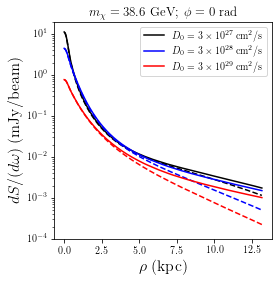

In [206]:
DA=780
thx_max_deg = 58/60
thx_max = thx_max_deg*np.pi/180
thx = np.linspace(0, thx_max, 200)
ls = ['--', '-']
colors = ['k', 'b', 'r']
th = [thx, 0*thx]
for sig, sphericalave, mx, D0 in zip(sig_set, sphericalave_out, mx_set_out, D0_set_out):
    D0_ind = np.where(D0_set_in==D0)[0][0]
    if sphericalave=='weighted_dl':
        label_str = r'$D_0 = ' + latex_float(D0, 1) + r' \; \rm{cm^2/s}$'
        line = ls[1]
    else:
        label_str = '_nolegend_'
        line=ls[0]
    sig_ar = np.array([np.exp(sig(x, y)) for x, y in zip(th[0], th[1])])
    plt.plot(th[0]*DA, sig_ar, linestyle=line, color=colors[D0_ind], label=label_str)
    
plt.title(r'$m_\chi = ' + str(mx_set_out[0]) + r'\; \rm{GeV}; \; \phi = ' + str(0) + r'\; \rm{rad}$' , size=13)
plt.xlabel(r'$\rho \;\rm{(kpc)}$', size=16)
plt.ylabel(r'$dS/(d\omega) \; \rm{(mJy/beam)}$', size=16)
plt.yscale('log')
ax = plt.gca()
ax.set_ylim([1e-4, 2e1])
ax.set_box_aspect(1)
plt.legend()
plt.savefig(fig_path+'sync_flux_vs_D0.pdf')

In [195]:
print(omega_beam)

2.1572435186680006e-07
